In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


In [3]:
# 1. Discriptive Statistics
group_M = np.array([245, 238, 252, 247, 241, 243, 236, 249, 251, 240, 244, 237, 246, 248, 239, 242, 253, 250, 243, 247])
group_N = np.array([268, 272, 265, 270, 269, 274, 267, 271, 266, 268, 275, 269, 264, 273, 270, 272, 268, 266, 271, 267])

def descriptive_stats(data):
    mean = np.mean(data)
    var = np.var(data, ddof=1)
    std = np.sqrt(var)
    return mean, var, std

mean_M, var_M, std_M = descriptive_stats(group_M)
mean_N, var_N, std_N = descriptive_stats(group_N)

print("1. Descriptive Statistics:")
print(f"Group M - Mean: {mean_M:.2f}, Variance: {var_M:.2f}, Std Dev: {std_M:.2f}")
print(f"Group N - Mean: {mean_N:.2f}, Variance: {var_N:.2f}, Std Dev: {std_N:.2f}")

# Variance ratio (F-test) for homogeneity
F = var_M / var_N
print(f"Variance ratio (F): {F:.2f}")

print("\nComment: Since the variance ratio is not close to 1, the variances are different.")
print("Pooled t-test assumption of equal variances may not hold.\n")



1. Descriptive Statistics:
Group M - Mean: 244.55, Variance: 25.94, Std Dev: 5.09
Group N - Mean: 269.25, Variance: 9.14, Std Dev: 3.02
Variance ratio (F): 2.84

Comment: Since the variance ratio is not close to 1, the variances are different.
Pooled t-test assumption of equal variances may not hold.



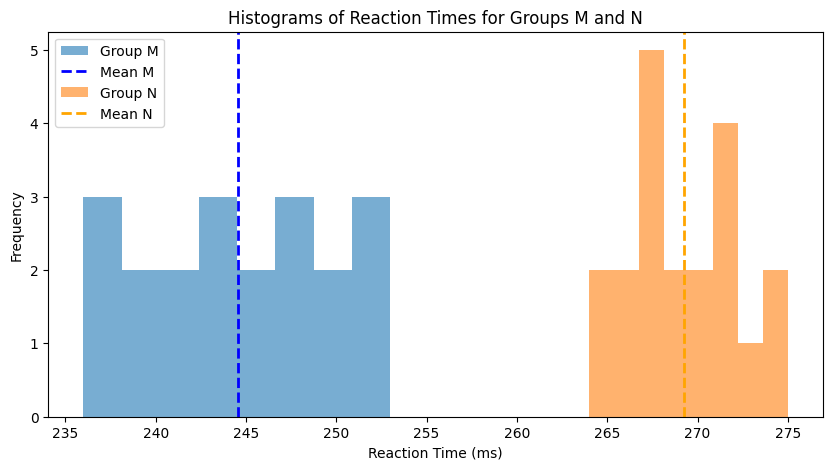

In [4]:
# 2. Data Visualization

plt.figure(figsize=(10,5))
plt.hist(group_M, bins=8, alpha=0.6, label='Group M')
plt.axvline(mean_M, color='blue', linestyle='dashed', linewidth=2, label='Mean M')
plt.hist(group_N, bins=8, alpha=0.6, label='Group N')
plt.axvline(mean_N, color='orange', linestyle='dashed', linewidth=2, label='Mean N')
plt.title('Histograms of Reaction Times for Groups M and N')
plt.xlabel('Reaction Time (ms)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


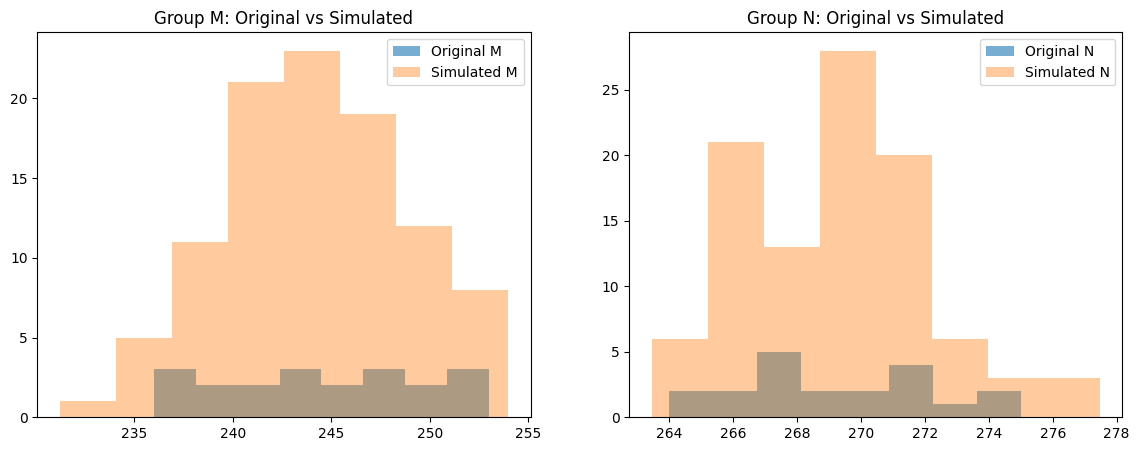

In [5]:
# 3. Random Number Generation

np.random.seed(42)
sim_M = np.random.normal(mean_M, std_M, 100)
sim_N = np.random.normal(mean_N, std_N, 100)

fig, axs = plt.subplots(1, 2, figsize=(14,5))

axs[0].hist(group_M, bins=8, alpha=0.6, label='Original M')
axs[0].hist(sim_M, bins=8, alpha=0.4, label='Simulated M')
axs[0].set_title('Group M: Original vs Simulated')
axs[0].legend()

axs[1].hist(group_N, bins=8, alpha=0.6, label='Original N')
axs[1].hist(sim_N, bins=8, alpha=0.4, label='Simulated N')
axs[1].set_title('Group N: Original vs Simulated')
axs[1].legend()

plt.show()

5. Hypothesis Testing (Pooled t-test):
Pooled Variance: 17.54
t-statistic: -18.65
Degrees of freedom: 38
p-value: 0.0000
Conclusion: Reject H0 - significant difference in mean reaction times.



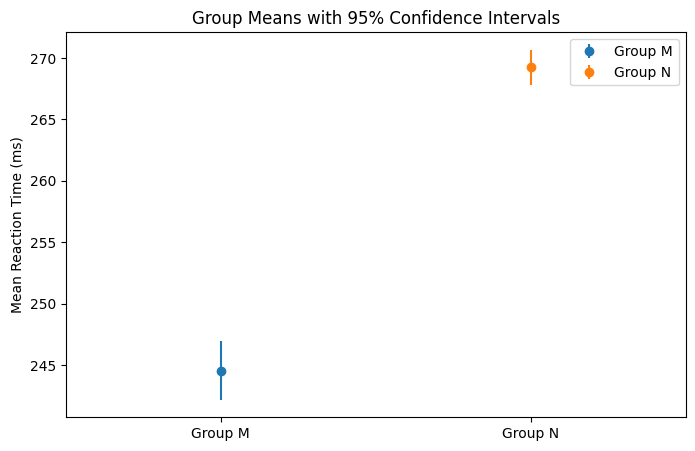

In [6]:
# 5. Hypothesis Testing (Pooled t-test)

n_M = len(group_M)
n_N = len(group_N)

# Pooled variance
s_p2 = ((n_M - 1)*var_M + (n_N - 1)*var_N) / (n_M + n_N - 2)

# t-statistic
t_stat = (mean_M - mean_N) / np.sqrt(s_p2 * (1/n_M + 1/n_N))

# Degrees of freedom
df = n_M + n_N - 2

# Two-tailed p-value
p_value = 2 * stats.t.sf(np.abs(t_stat), df)

print("5. Hypothesis Testing (Pooled t-test):")
print(f"Pooled Variance: {s_p2:.2f}")
print(f"t-statistic: {t_stat:.2f}")
print(f"Degrees of freedom: {df}")
print(f"p-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Conclusion: Reject H0 - significant difference in mean reaction times.\n")
else:
    print("Conclusion: Fail to reject H0 - no significant difference.\n")

# 95% Confidence intervals for means
def conf_interval(mean, std, n):
    se = std / np.sqrt(n)
    margin = stats.t.ppf(1 - alpha/2, n - 1) * se
    return mean - margin, mean + margin

ci_M = conf_interval(mean_M, std_M, n_M)
ci_N = conf_interval(mean_N, std_N, n_N)

plt.figure(figsize=(8,5))
plt.errorbar(1, mean_M, yerr=[[mean_M - ci_M[0]], [ci_M[1] - mean_M]], fmt='o', label='Group M')
plt.errorbar(2, mean_N, yerr=[[mean_N - ci_N[0]], [ci_N[1] - mean_N]], fmt='o', label='Group N')
plt.xlim(0.5, 2.5)
plt.xticks([1, 2], ['Group M', 'Group N'])
plt.ylabel('Mean Reaction Time (ms)')
plt.title('Group Means with 95% Confidence Intervals')
plt.legend()
plt.show()

In [8]:
# 6. Unique Personalization

# Replace this with your actual student ID last two digits
student_id_last_two = 20  # example
adjust_val = student_id_last_two % 5  # mod 5 adjustment

group_N_personalized = group_N + adjust_val

mean_N_p, var_N_p, std_N_p = descriptive_stats(group_N_personalized)

# Recalculate pooled variance
s_p2_p = ((n_M - 1)*var_M + (n_N - 1)*var_N_p) / (n_M + n_N - 2)

# Recalculate t-statistic
t_stat_p = (mean_M - mean_N_p) / np.sqrt(s_p2_p * (1/n_M + 1/n_N))

# Recalculate p-value
p_value_p = 2 * stats.t.sf(np.abs(t_stat_p), df)

print(f"6. Personalized Data Hypothesis Test (adjust value = {adjust_val}):")
print(f"New Group N Mean: {mean_N_p:.2f}")
print(f"New Pooled Variance: {s_p2_p:.2f}")
print(f"New t-statistic: {t_stat_p:.2f}")
print(f"New p-value: {p_value_p:.4f}")

if p_value_p < alpha:
    print("Conclusion: Reject H0 - significant difference (personalized data).")
else:
    print("Conclusion: Fail to reject H0 - no significant difference (personalized data).")

6. Personalized Data Hypothesis Test (adjust value = 0):
New Group N Mean: 269.25
New Pooled Variance: 17.54
New t-statistic: -18.65
New p-value: 0.0000
Conclusion: Reject H0 - significant difference (personalized data).
